# Machine Learning on Costumer Churn

**1. Define problem


**2. Summarize data


**3. Prepare data


**4. Evaluate Algorithms


**5. Present Results

## 1. Define the problem 

In [1]:
# Gives tools to organize and analyse the data
# pd as shortname convention
import pandas as pd

In [2]:
# Pandas function that loads the data 
data = pd.read_csv('churn.csv')

## 2. Summarize data

In [3]:
# pandas method see the first 5 results
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
# see the last 5 results
data.tail()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False.


In [5]:
# display all columns
pd.set_option('display.max_columns', 21)

In [6]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Column Description:
* state in the US
* account length
* Area Code
* Phone Number
* International Plan (yes/no)
* Voice mail plan (yes/no)
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes
* total night calls
* total night charge
* total intl minutes
* total intl calls
* total intl charge
* customer service calls
* churn

In [7]:
# dimensionality: how many costumers we have and how many features
data.shape

(3333, 21)

In [8]:
# feature names

In [9]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [10]:
# Manipulating column names: convert spaces and special characters into condensed names

In [11]:
data.columns = data.columns.str.replace(' ', '_')

In [12]:
data.columns = data.columns.str.replace('?', '')

In [13]:
data.columns = data.columns.str.replace("'", '_')

In [14]:
data.columns 

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'Int_l_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn'],
      dtype='object')

In [15]:
# pandas method to read data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account_Length    3333 non-null int64
Area_Code         3333 non-null int64
Phone             3333 non-null object
Int_l_Plan        3333 non-null object
VMail_Plan        3333 non-null object
VMail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Mins          3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Mins        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Mins         3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


## Graphs / visualization

In [16]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#### Costumers who did and did not churn

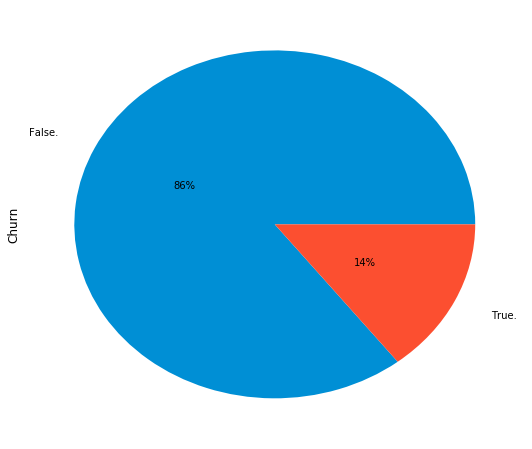

In [17]:
a = data["Churn"].value_counts()
ax = a.plot.pie(y="Churn", figsize=(8, 8), autopct='%1.0f%%',pctdistance=0.5, labeldistance=1.2)
plt.show()

In [18]:
#Imbalanced Data
(2850/3333)*100

85.5085508550855

#### Churn By State

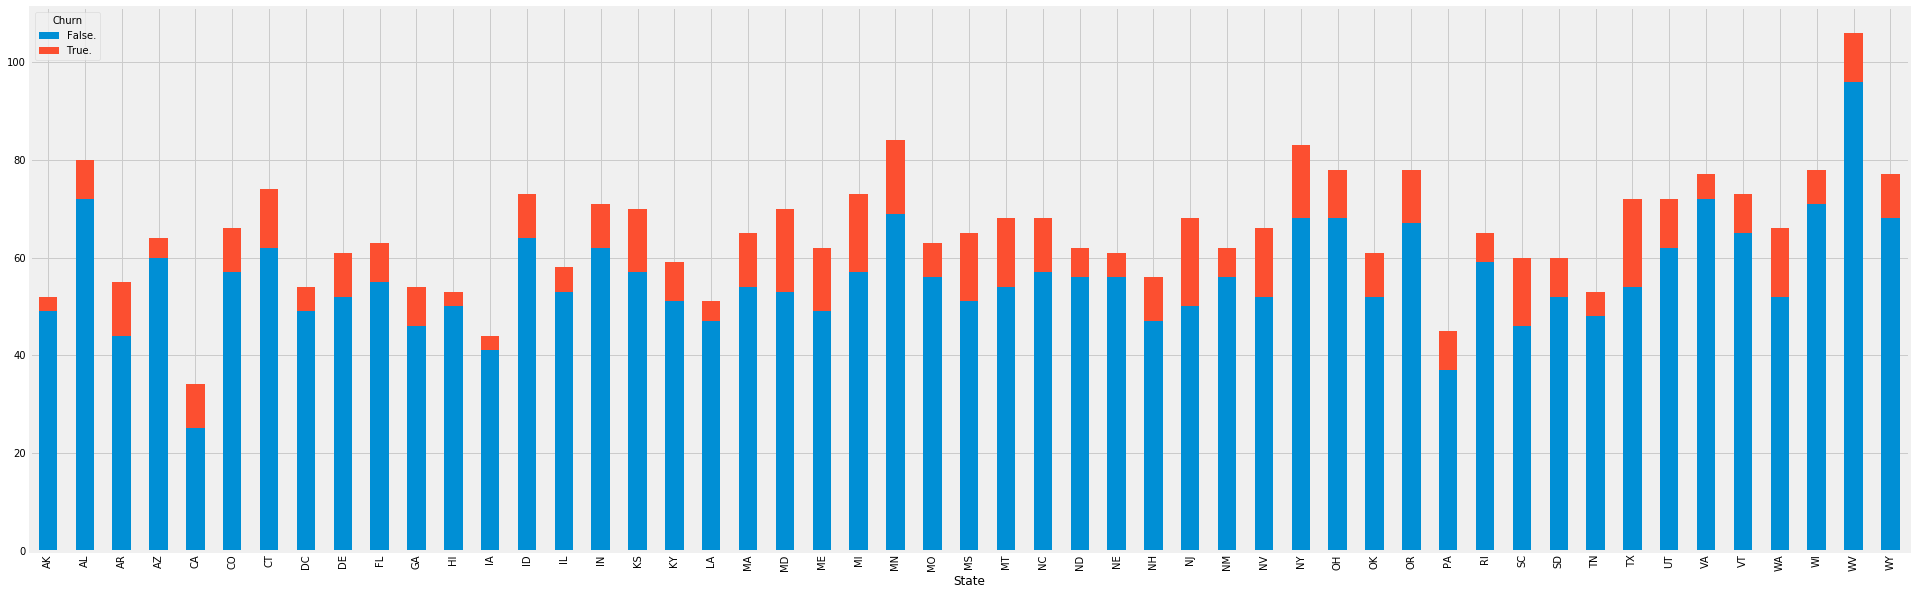

In [19]:
# groupby: groups series of values
# unstack: returns a pivot that is a dataframe

data.groupby(["State", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 
plt.show()

#### Churn By Area Code

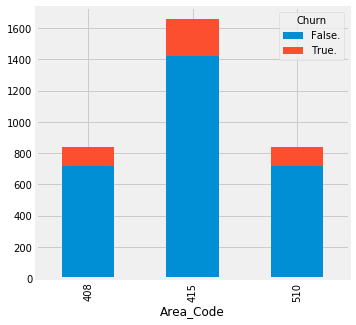

In [20]:
data.groupby(["Area_Code", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.show()

#### Churn By Customers with International plan

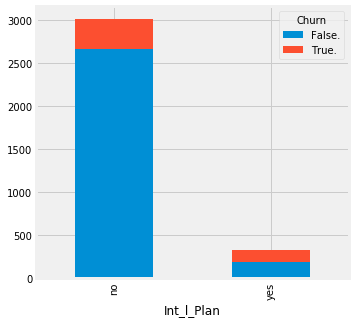

In [21]:
data.groupby(["Int_l_Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.show()

#### Churn By Customers with Voice mail plan

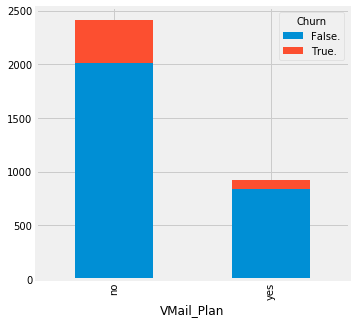

In [22]:
data.groupby(["VMail_Plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.show()

## 3. Prepare data

**Data Pre-processing or variable selection**

Not all variables are useful in predicting if a customer will churn. 

For example, the customers phone number is completely useless in predicting because it is unique to each customer.

In [23]:
# Drop the columns that we have decided won't be used in prediction: 2 categorical, 1 numeric
# axis=1 denotes that we are referring to a column, not a row
data = data.drop(["Phone", "Area_Code", "State"], axis=1)

In [24]:
import numpy as np
#numpy is a library that allow us to work with data in arrays
# we need to convert the objects to numeric
data["Churn"] = np.where(data["Churn"] == 'True.',1,0)

In [25]:
data.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [26]:
# we also need to convert the remaining object columns to numeric 
data["Int_l_Plan"] = np.where(data["Int_l_Plan"] == 'yes',1,0)
data["VMail_Plan"] = np.where(data["VMail_Plan"] == 'yes',1,0)

In [27]:
data.head()

,Account_Length,Int_l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [28]:
type(data)

pandas.core.frame.DataFrame

In [29]:
len(data.columns)

18

In [30]:
# We have 18 columns. Our last column in our predict target: does costumer churn or not.
# therefore we will call X our features and y our target
# convert for dataframe to numpy ndarray.
# why do I have to use an np array instead of a regular array?
# np arrays are multidimensional arrays
# better in terms of faster computation and ease of manipulation.
array = data.values

In [31]:
type(array)

numpy.ndarray

In [32]:
# X is capitalized because it represents a matrix and y is lowercase because it is a vector
X = array[:,0:17]
y = array[:,17:]


## 4. Evaluate Algorithms

We will use 80% of the data for modeling and 20% for validation, as seen on test_size=0.2.

In [33]:
# Test size = 0.2 means that our dataset was split 80% / 20%
# specify the random seed = 7: Because the split of the data is random, we want to ensure that the results are reproducible.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [34]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2666, 17) (2666, 1)
(667, 17) (667, 1)


Remember from above, our initial dataset has 3333 observations.

By splitting the data by 80/20, we get 2666 observations for the train data, and 667 observations for the test data.

On X our independent variable matrix, we seill have 17 features or predictors.

On y, our dependent variable, the one we are trying to predict, we only have one feature, which is the output, churn/not churn. This is a vector, and not a matrix, since this only contains the prediction values from our initial dataset.

**Algorithms for Classification Problems:**

** Logistic Regression (LR)


** Linear Discriminant Analysis (LDA)


** Classification and Regression Trees (CART)


** Support Vector Machines (SVM)


** Gaussian Naive Bayes (NB)


** k-Nearest Neighbors (KNN)

The process is as follows:

* Import the relevant class


* Define model/Instantiate the estimator


* Fit the model on the training data: model training, where model learns the relationship between the features and response


* After fitting the model we will try to predict on the test data (new observations).


* We will print these predictions for all models.


* Print the accuracy score for each model.

###  Logistic Regression (LR)

In [35]:
# Import the relevant class
from sklearn.linear_model import LogisticRegression as LR

# Define model/Instantiate the estimator
lr = LR()

# Fit model: pass two argumnets: the feature matrix X and the response vector y
# .ravel() is a library-level function that converts to a 1d array (before y was column-vector)
lr_model = lr.fit(X_train, y_train.ravel())

# get predicted values on test data (or new data)
predictions_lr = lr.predict(X_test)

#by default, it assumes accuracy score
print(predictions_lr[0:40])
print(lr_model.score(X_test, y_test))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.8545727136431784


### From here I will aggregate all algorithms together

In [36]:
#Import all algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as CART
from sklearn.svm import SVC as SVM
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN

In [37]:
# Define model for each algorithm

lda = LDA()
cart = CART()
svm = SVM()
nb = NB()
knn = KNN()

In [38]:
# Fit model/Instantiate the estimator
# Fit model: pass two argumnets: the feature matrix X and the response vector y
# .ravel() is a library-level function that converts to a 1d array (before y was column-vector)


lda_model = lda.fit(X_train, y_train.ravel())
cart_model = cart.fit(X_train, y_train.ravel())
svm_model = svm.fit(X_train, y_train.ravel())
nb_model = nb.fit(X_train, y_train.ravel())
knn_model = knn.fit(X_train, y_train.ravel())

In [39]:
# get predicted values on test data (or new data)


predictions_lda = lda.predict(X_test)
predictions_cart = cart.predict(X_test)
predictions_svm = svm.predict(X_test)
predictions_nb = nb.predict(X_test)
predictions_knn = knn.predict(X_test)

In [40]:
#by default, it assumes accuracy score


print(predictions_lda[0:40])
print(lda_model.score(X_test, y_test))

print(predictions_cart[0:40])
print(cart_model.score(X_test, y_test))

print(predictions_svm[0:40])
print(svm_model.score(X_test, y_test))

print(predictions_nb[0:40])
print(nb_model.score(X_test, y_test))

print(predictions_knn[0:5])
print(knn_model.score(X_test, y_test))

[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.8500749625187406
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
0.9130434782608695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.848575712143928
[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
0.863568215892054
[0. 0. 0. 0. 0.]
0.8650674662668666


### Summary of classification models in terms of metric: accuracy

** Logistic Regression (LR)


** Linear Discriminant Analysis (LDA)


** Classification and Regression Trees (CART)


** Support Vector Machines (SVM)


** Gaussian Naive Bayes (NB)


** k-Nearest Neighbors (KNN)

In [41]:
print("Logistic Regression (LR) Accuracy is" , round(lr_model.score(X_test, y_test)*100,2), "%")

print("Linear Discriminant Analysis (LDA) Accuracy is" , round(lda_model.score(X_test, y_test)*100,2),"%")

print("Classification and Regression Trees (CART) Accuracy is" , round(cart_model.score(X_test, y_test)*100,2),"%")

print("Support Vector Machines (SVM) Accuracy is" , round(svm_model.score(X_test, y_test)*100,2),"%")

print("Gaussian Naive Bayes (NB) Accuracy is" , round(nb_model.score(X_test, y_test)*100,2),"%")

print("k-Nearest Neighbors (KNN) Accuracy is" , round(knn_model.score(X_test, y_test)*100,2),"%")

Logistic Regression (LR) Accuracy is 85.46 %
Linear Discriminant Analysis (LDA) Accuracy is 85.01 %
Classification and Regression Trees (CART) Accuracy is 91.3 %
Support Vector Machines (SVM) Accuracy is 84.86 %
Gaussian Naive Bayes (NB) Accuracy is 86.36 %
k-Nearest Neighbors (KNN) Accuracy is 86.51 %


Classification and Regression Trees had the highest accuracy score.

## Confusion Matrix

* **Confusion Matrix** will decompose all test results into **True Positive, True Negative, False Positive, False Negative**

* Accuracy as a measure of (TP + TN ) / Total predictions

* Sensitivity might be a better metric: TP / Actual Yes

**TN - True negatives :** we predicted a costumer would not churn and they did not churn.

**FP - False positives :** We predicted a costumer would churn, but they did not.

**FN - False negatives :** we predicted a costumer would not churn and they actually churn.

**TP - True positives :** we predicted a costumer churn and they actually churn.

In [42]:
# the sum of all observations is the number of test observations
# more expensive to predict that a costumer did not churn, and it actually did churn
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix_lr = pd.DataFrame(
    confusion_matrix(y_test, predictions_lr), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
confusion_matrix_lr

,Predicted False,Predicted True
Actual False,556,10
Actual True,87,14


In [44]:
confusion_matrix_lda = pd.DataFrame(
    confusion_matrix(y_test, predictions_lda), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
confusion_matrix_lda

,Predicted False,Predicted True
Actual False,545,21
Actual True,79,22


In [45]:
confusion_matrix_cart = pd.DataFrame(
    confusion_matrix(y_test, predictions_cart), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
confusion_matrix_cart

,Predicted False,Predicted True
Actual False,534,32
Actual True,26,75


In [46]:
confusion_matrix_svm = pd.DataFrame(
    confusion_matrix(y_test, predictions_svm), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
confusion_matrix_svm

,Predicted False,Predicted True
Actual False,566,0
Actual True,101,0


In [47]:
confusion_matrix_nb = pd.DataFrame(
    confusion_matrix(y_test, predictions_nb), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
confusion_matrix_nb

,Predicted False,Predicted True
Actual False,527,39
Actual True,52,49


In [48]:
confusion_matrix_knn = pd.DataFrame(
    confusion_matrix(y_test, predictions_knn), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
confusion_matrix_knn

,Predicted False,Predicted True
Actual False,551,15
Actual True,75,26


## 5. Present Results

In [49]:
# Submissions can be printed to a csv (.to_csv('name.csv'))

In [50]:
my_submission = pd.DataFrame(predictions_cart, columns=['predictions']).to_csv('prediction.csv')